## Building a GPT

Loosely derived from Karpathy's [Zero To Hero](https://karpathy.ai/zero-to-hero.html) video on GPT. Significant changes for my understanding (kma@pebblebed.com)

In [9]:
%pip install datasets transformers zstandard matplotlib
import torch
import text_data
import conv_text
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 53.7 MB/s eta 0:00:0031m55.9 MB/s eta 0:00:01
  Using cached Pillow-9.4.0-cp310-cp310-manylinux_2_28_x86_64.whl (3.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 KB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 KB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


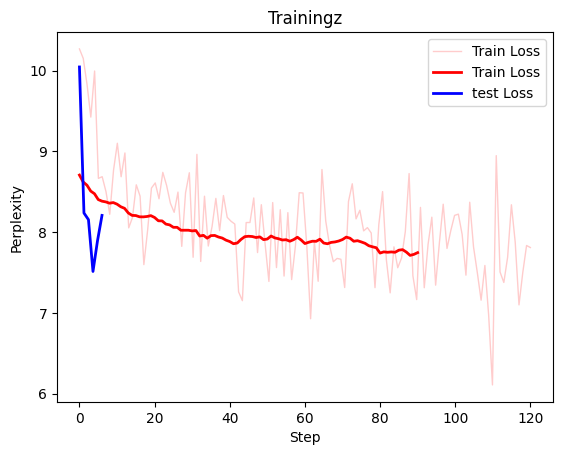

In [16]:
tdat = torch.load('training-log.pt')
train = torch.tensor(tdat['train']).cpu().numpy()
test = torch.tensor(tdat['test']).cpu().numpy()
(train, test)

import matplotlib.pyplot as plt

xspace = np.linspace(0, len(train), len(train))
smoothed_train = np.convolve(train, np.ones(30)/30, mode='valid')
plt.plot( xspace, train, label = 'Train Loss', color='#ffcccc', linewidth=1)
plt.plot( smoothed_train, label = 'Train Loss', color='r', linewidth=2)
xspace = np.linspace(0, len(test), len(test))
plt.plot( xspace, test, label = 'test Loss', color='b', linewidth=2)

plt.xlabel('Step')
plt.ylabel('Perplexity')
plt.legend(loc='upper right')
plt.title('Trainingz')
plt.show()
